In [ ]:
import json

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [29]:
# Global variables
BATCH_SIZE = 128
EPOCHS = 100

In [30]:
# Get the class weights from a JSON file
with open('class_weights.json', "r") as f:
    class_weight_dict = json.load(f)

In [31]:
# Preprocessed data
X_train = np.load('preprocessed_data/X_train.npy')
y_train = np.load('preprocessed_data/y_train.npy')
X_test = np.load('preprocessed_data/X_test.npy')
y_test = np.load('preprocessed_data/y_test.npy')

In [32]:
# Transform the y_train and y_test labels to categorical
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test_cat = to_categorical(y_test, num_classes=len(np.unique(y_train)))

In [33]:
# Model definition
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(60, X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

/Users/davidtruhlar/Documents/FIIT/BP/5GDigitalTwin/Implementation/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [36]:
# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.4400 - loss: 1.4129 - val_accuracy: 0.5931 - val_loss: 0.9578
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.6215 - loss: 0.9536 - val_accuracy: 0.6611 - val_loss: 0.8404
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.6607 - loss: 0.8550 - val_accuracy: 0.6913 - val_loss: 0.7526
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.6844 - loss: 0.7929 - val_accuracy: 0.7010 - val_loss: 0.7153
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.6970 - loss: 0.7357 - val_accuracy: 0.7378 - val_loss: 0.6529
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.7221 - loss: 0.6894 - val_accuracy: 0.7690 - val_loss: 0.6056
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.7349 - loss: 0.6569 - val_accuracy: 0.7435 - val_loss: 0.5972
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.7459 - loss: 0

274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step


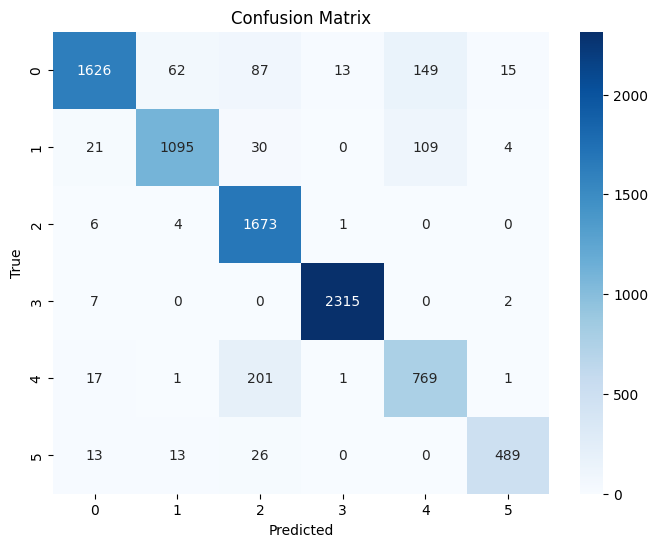

In [37]:
# Predictions
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [38]:
# Classification report
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.962     0.833     0.893      1952
           1      0.932     0.870     0.900      1259
           2      0.829     0.993     0.904      1684
           3      0.994     0.996     0.995      2324
           4      0.749     0.777     0.763       990
           5      0.957     0.904     0.930       541

    accuracy                          0.911      8750
   macro avg      0.904     0.895     0.897      8750
weighted avg      0.916     0.911     0.911      8750



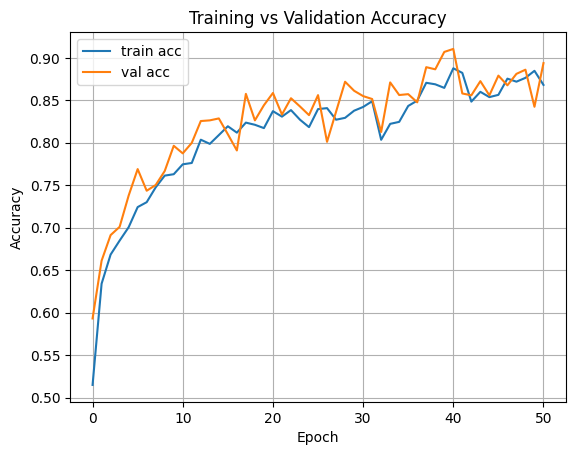

In [39]:
# Plot the training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Save the model
model.save('trained_models/lstm_robust_model.h5')
model.save('trained_models/lstm_robust_model.keras')